In [38]:
!pip install matplotlib 
!pip install adjustText 

import json
import re
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


/tmp/ipykernel_2626506/374862202.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(mmlu_performance))
/tmp/ipykernel_2626506/374862202.py:193: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


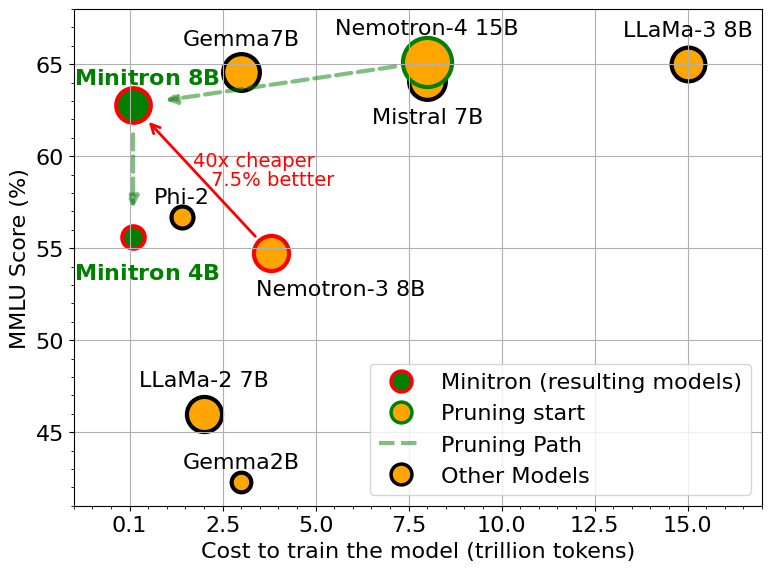

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
# Data from the table with additional non-embedding parameters
models = ['LLaMa-3 8B', 'LLaMa-2 7B', 'Mistral 7B', 'Nemotron-4 15B', 'Nemotron-3 8B', 'Minitron 8B', 'Minitron 4B', "Gemma2B", "Phi-2"]
training_tokens = [15, 2,      8,     8,   3.8, 0.094, 0.094,   3, 1.4]  # in trillions
mmlu_performance =[65, 46, 64.07, 65.13, 54.73, 62.78, 55.59, 42.3, 56.7]  # percentages
non_emb_params = [5.9, 6.4, 7, 12.5, 6.4, 6.2, 2.6, 2, 2.5]  # in billions

# Gemma7B has MMLU of 66.03/64.56
#name, mmlu, train, size
model="Gemma7B,64.56,3,7"
models.append(model.split(",")[0]); mmlu_performance.append(float(model.split(",")[1])); training_tokens.append(float(model.split(",")[2])); non_emb_params.append(float(model.split(",")[3]))
# model="LLaMa2-13B,55.77,2,13"
# models.append(model.split(",")[0]); mmlu_performance.append(float(model.split(",")[1])); training_tokens.append(float(model.split(",")[2])); non_emb_params.append(float(model.split(",")[3]))
# model="Yi-6B,63.85,3,5.5"
# models.append(model.split(",")[0]); mmlu_performance.append(float(model.split(",")[1])); training_tokens.append(float(model.split(",")[2])); non_emb_params.append(float(model.split(",")[3]))

# Scaling the size for better visualization
size_scale = 400
size_scale = 100
sizes = [size_scale*ff for ff in non_emb_params]

training_tokens, non_emb_params = non_emb_params, training_tokens




# Colors for the models
colors = plt.cm.get_cmap('viridis', len(mmlu_performance))

# Creating a scatter plot with size of the points based on non-embedding parameters
# fig, ax = plt.subplots(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(8, 6))
plt.grid(True)
for i, (label, xi, yi, size) in enumerate(zip(models, non_emb_params, mmlu_performance, sizes)):
    edgecolor = "r" if "Minitron" in label or ("Nemotron" in label) else "k"
    edgecolor = "g" if ("Nemotron-4 15B" in label) else edgecolor
    color = "green" if "Minitron" in label else "orange"
    plt.scatter(xi, yi, s=size, color=color, alpha=1.0, edgecolors=edgecolor, linewidth=3, label=label)
    # Annotating with offset to avoid overlapping
    offset = (20, 15) if "Minitron" in label else (0, 20)
    if "Nemotron-3 8B" in label: offset = (50, -30)
    if "Mistral" in label: offset = (0, -30)
    # if Minitron in the name then bold the label
    # label = r"$\bf{Minitron\ 8B}$" if "Minitron 8B" in label else label
    # label = r"$\bf{Minitron\ 4B}$" if "Minitron 4B" in label else label
    if "Minitron 4B" in label:
        label = r"$\bf{Minitron\ 4B}$" 
        offset = (10, -30)
    if ("Phi-2" in label) or ("Gemma2B" in label):
        offset = (0,10)
    if "Minitron 8B" in label:
        label = r"$\bf{Minitron\ 8B}$" 
        offset = (10, 15)
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=offset, ha='center', fontsize=16, color='green' if "Minitron" in label else 'k')

if 0:
    # Adding the red arrow between Nemotron-4 15B and Minitron-4 8B
    start_x, start_y = non_emb_params[3], mmlu_performance[3]
    end_x, end_y = non_emb_params[5], mmlu_performance[5]

    # Shortening the arrow by 5% from each side
    arrow_shorten_factor = 0.05
    dx, dy = end_x - start_x, end_y - start_y
    start_x += arrow_shorten_factor * dx
    start_y += arrow_shorten_factor * dy
    end_x -= arrow_shorten_factor * dx
    end_y -= arrow_shorten_factor * dy

    # Calculate the angle of the arrow
    angle = np.arctan2(end_y - start_y, start_x - end_x) * 180 / np.pi + 13

    plt.annotate("", xy=(end_x, end_y), xytext=(start_x, start_y),
                arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='-|>', lw=2))
    # headwidth=20,, headlength=20
    mid_x, mid_y = (start_x + end_x) / 2, (start_y + end_y) / 2
    plt.text(mid_x, mid_y, "2x smaller", fontsize=12, color='red', rotation=angle, ha='center', va='center', rotation_mode='anchor')



# Adding the red arrow between Nemotron-3 8B and Minitron-4 8B
start_x2, start_y2 = non_emb_params[4], mmlu_performance[4]
end_x2, end_y2 = non_emb_params[5], mmlu_performance[5]

# Shortening the arrow by 5% from each side
arrow_shorten_factor = 0.1
dx2, dy2 = end_x2 - start_x2, end_y2 - start_y2
start_x2 += arrow_shorten_factor * dx2
start_y2 += arrow_shorten_factor * dy2
end_x2 -= arrow_shorten_factor * dx2
end_y2 -= arrow_shorten_factor * dy2

# Calculate the angle of the arrow
angle2 = np.arctan2(end_y2 - start_y2, end_x2 - start_x2) * 180 / np.pi - 180 +10 +2

plt.annotate("", xy=(end_x2, end_y2), xytext=(start_x2, start_y2),
             arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', linewidth=2))

mid_x2, mid_y2 = (start_x2 + end_x2) / 2, (start_y2 + end_y2) / 2
# plt.text(mid_x2+0.4, mid_y2+0., "40x cheaper", fontsize=12, color='red', rotation=angle2, ha='center', va='center', rotation_mode='anchor')
# plt.text(mid_x2-0.3, mid_y2-0.4, "7.5% bettter", fontsize=12, color='red', rotation=angle2, ha='center', va='center', rotation_mode='anchor')
plt.text(mid_x2+1.4, mid_y2+1, "40x cheaper", fontsize=14, color='red', ha='center', va='center', rotation_mode='anchor')
plt.text(mid_x2+1.9, mid_y2-0., "7.5% bettter", fontsize=14, color='red',  ha='center', va='center', rotation_mode='anchor')

if 0:
    # Adding the red arrow between Nemotron-3 8B and Minitron-4 4B
    start_x, start_y = non_emb_params[4], mmlu_performance[4]
    end_x, end_y = non_emb_params[6], mmlu_performance[6]

    # Shortening the arrow by 5% from each side
    arrow_shorten_factor = 0.1
    dx, dy = end_x - start_x, end_y - start_y
    start_x += arrow_shorten_factor * dx
    start_y += arrow_shorten_factor * dy
    end_x -= arrow_shorten_factor * dx
    end_y -= arrow_shorten_factor * dy

    # Calculate the angle of the arrow
    angle = np.arctan2(end_y - start_y, start_x - end_x) * 180 / np.pi -5

    plt.annotate("", xy=(end_x, end_y), xytext=(start_x, start_y),
                arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='-|>', lw=2))
    # headwidth=20,, headlength=20
    mid_x, mid_y = (start_x + end_x) / 2, (start_y + end_y) / 2
    # plt.text(mid_x+0.2, mid_y-0.6, "2x smaller", fontsize=12, color='red', rotation=angle, ha='center', va='center', rotation_mode='anchor')

if 1:
    # Adding the red arrow between Nemotron-3 8B and Minitron-4 4B
    start_x, start_y = non_emb_params[3], mmlu_performance[3]
    end_x, end_y = non_emb_params[5], mmlu_performance[5]

    # Shortening the arrow by 5% from each side
    arrow_shorten_factor = 0.1
    dx, dy = end_x - start_x, end_y - start_y
    start_x += arrow_shorten_factor * dx
    start_y += arrow_shorten_factor * dy
    end_x -= arrow_shorten_factor * dx
    end_y -= arrow_shorten_factor * dy

    # Calculate the angle of the arrow
    angle = np.arctan2(end_y - start_y, start_x - end_x) * 180 / np.pi -5

    plt.annotate("", xy=(end_x, end_y), xytext=(start_x, start_y),
                arrowprops=dict(facecolor='gray', edgecolor='green', arrowstyle='-|>', lw=3, linestyle='--', alpha=0.5))
    # headwidth=20,, headlength=20
    # arrowprops=dict(arrowstyle= '<|-|>',
                            #  color='blue',
                            #  lw=3.5,
                            #  ls='--')
    mid_x, mid_y = (start_x + end_x) / 2, (start_y + end_y) / 2
    # plt.text(mid_x+0.2, mid_y-0.6, "2x smaller", fontsize=12, color='red', rotation=angle, ha='center', va='center', rotation_mode='anchor')

if 1:
    # Adding the red arrow between Nemotron-3 8B and Minitron-4 4B
    start_x, start_y = non_emb_params[5], mmlu_performance[5]
    end_x, end_y = non_emb_params[6], mmlu_performance[6]

    # Shortening the arrow by 5% from each side
    arrow_shorten_factor = 0.2
    dx, dy = end_x - start_x, end_y - start_y
    start_x += arrow_shorten_factor * dx
    start_y += arrow_shorten_factor * dy
    end_x -= arrow_shorten_factor * dx
    end_y -= arrow_shorten_factor * dy

    # Calculate the angle of the arrow
    angle = np.arctan2(end_y - start_y, start_x - end_x) * 180 / np.pi -5

    plt.annotate("", xy=(end_x, end_y), xytext=(start_x, start_y),
                arrowprops=dict(facecolor='gray', edgecolor='green', arrowstyle='-|>', lw=3, linestyle='--', alpha=0.5))
    # headwidth=20,, headlength=20
    mid_x, mid_y = (start_x + end_x) / 2, (start_y + end_y) / 2
    # plt.text(mid_x+0.2, mid_y-0.6, "2x smaller", fontsize=12, color='red', rotation=angle, ha='center', va='center', rotation_mode='anchor')



plt.xlabel('Cost to train the model (trillion tokens)')
plt.ylabel('MMLU Score (%)')
# plt.gca().invert_xaxis()
plt.xlim(-1.5, 17)
plt.ylim(41, 68)
#turn minor ticks on
plt.minorticks_on()
#change the first label text of the ticks to 0.1
ticks = np.arange(0, 17, 3)
ticks[0] = 0.1
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = '0.1'

ax.set_xticklabels(labels)
# ax.set_xticks(ticks)

# ax.set_xscale('log')
# add legend with only 3 entries: Minitron, pruning path via gray arrow
# plt.legend(loc='bottom right')
# Adding legend with only 3 entries: Minitron, pruning path via gray arrow
custom_lines = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markeredgecolor='red', markersize=15, lw=4, markeredgewidth=2.5,),
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markeredgecolor='green', markersize=15, lw=4, markeredgewidth=2.5),
                plt.Line2D([0], [0], linestyle='--', color='green', lw=3, alpha=0.5),
                plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markeredgecolor='black', markersize=15, lw=4, markeredgewidth=2.5),]
# instead of line2d plot a circle with edge
# custom_lines = [plt.Circle((0,0), 0.1, color='green', lw=4),
#                 
ax.legend(custom_lines, ['Minitron (resulting models)', "Pruning start", 'Pruning Path', 'Other Models'], loc='lower right')



plt.tight_layout()
plt.savefig("minitron_mmlu.pdf", bbox_inches='tight')

plt.show()


/tmp/ipykernel_2598417/3786444743.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(mmlu_performance))


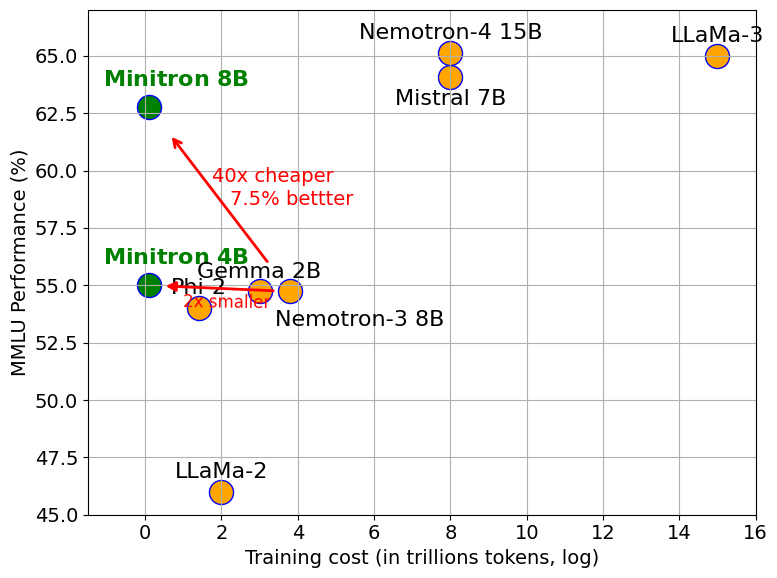

In [207]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
# Data from the table with additional non-embedding parameters
models = ['LLaMa-3', 'LLaMa-2', 'Mistral 7B', 'Nemotron-4 15B', 'Nemotron-3 8B', 'Minitron 8B', 'Minitron 4B', "Gemma 2B", "Phi-2"]
training_tokens = [15, 2, 8, 8, 3.8, 0.094, 0.094, 3, 1.4]  # in trillions
mmlu_performance = [65, 46, 64.07, 65.13, 54.73, 62.78, 55.0, 54.73, 54]  # percentages
non_emb_params = [5.9, 6.4, 7, 12.5, 6.4, 6.2, 2.6, 2, 1.4, 2.5]  # in billions


training_tokens, non_emb_params = non_emb_params, training_tokens


# Scaling the size for better visualization
size_scale = 300
sizes = [size_scale for _ in training_tokens]

# Colors for the models
colors = plt.cm.get_cmap('viridis', len(mmlu_performance))

# Creating a scatter plot with size of the points based on non-embedding parameters
# fig, ax = plt.subplots(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(8, 6))
plt.grid(True)
for i, (label, xi, yi, size) in enumerate(zip(models, non_emb_params, mmlu_performance, sizes)):
    color = "green" if "Minitron" in label else "orange"
    plt.scatter(xi, yi, s=size, color=color, alpha=1.0, edgecolors="b", linewidth=1, label=label)
    # Annotating with offset to avoid overlapping
    offset = (20, 15) if "Minitron" in label else (0, 10)
    if "Nemotron-3 8B" in label: offset = (50, -25)
    if "Mistral" in label: offset = (0, -20)
    # if Minitron in the name then bold the label
    label = r"$\bf{Minitron\ 8B}$" if "Minitron 8B" in label else label
    label = r"$\bf{Minitron\ 4B}$" if "Minitron 4B" in label else label
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=offset, ha='center', fontsize=16, color='green' if "Minitron" in label else 'k')

if 0:
    # Adding the red arrow between Nemotron-4 15B and Minitron-4 8B
    start_x, start_y = non_emb_params[3], mmlu_performance[3]
    end_x, end_y = non_emb_params[5], mmlu_performance[5]

    # Shortening the arrow by 5% from each side
    arrow_shorten_factor = 0.05
    dx, dy = end_x - start_x, end_y - start_y
    start_x += arrow_shorten_factor * dx
    start_y += arrow_shorten_factor * dy
    end_x -= arrow_shorten_factor * dx
    end_y -= arrow_shorten_factor * dy

    # Calculate the angle of the arrow
    angle = np.arctan2(end_y - start_y, start_x - end_x) * 180 / np.pi + 13

    plt.annotate("", xy=(end_x, end_y), xytext=(start_x, start_y),
                arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='-|>', lw=2))
    # headwidth=20,, headlength=20
    mid_x, mid_y = (start_x + end_x) / 2, (start_y + end_y) / 2
    plt.text(mid_x, mid_y, "2x smaller", fontsize=12, color='red', rotation=angle, ha='center', va='center', rotation_mode='anchor')



# Adding the red arrow between Nemotron-3 8B and Minitron-4 8B
start_x2, start_y2 = non_emb_params[4], mmlu_performance[4]
end_x2, end_y2 = non_emb_params[5], mmlu_performance[5]

# Shortening the arrow by 5% from each side
arrow_shorten_factor = 0.15
dx2, dy2 = end_x2 - start_x2, end_y2 - start_y2
start_x2 += arrow_shorten_factor * dx2
start_y2 += arrow_shorten_factor * dy2
end_x2 -= arrow_shorten_factor * dx2
end_y2 -= arrow_shorten_factor * dy2

# Calculate the angle of the arrow
angle2 = np.arctan2(end_y2 - start_y2, end_x2 - start_x2) * 180 / np.pi - 180 +10 +2

plt.annotate("", xy=(end_x2, end_y2), xytext=(start_x2, start_y2),
             arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', linewidth=2))

mid_x2, mid_y2 = (start_x2 + end_x2) / 2, (start_y2 + end_y2) / 2
# plt.text(mid_x2+0.4, mid_y2+0., "40x cheaper", fontsize=12, color='red', rotation=angle2, ha='center', va='center', rotation_mode='anchor')
# plt.text(mid_x2-0.3, mid_y2-0.4, "7.5% bettter", fontsize=12, color='red', rotation=angle2, ha='center', va='center', rotation_mode='anchor')
plt.text(mid_x2+1.4, mid_y2+1, "40x cheaper", fontsize=14, color='red', ha='center', va='center', rotation_mode='anchor')
plt.text(mid_x2+1.9, mid_y2-0., "7.5% bettter", fontsize=14, color='red',  ha='center', va='center', rotation_mode='anchor')


# Adding the red arrow between Nemotron-3 8B and Minitron-4 4B
start_x, start_y = non_emb_params[4], mmlu_performance[4]
end_x, end_y = non_emb_params[6], mmlu_performance[6]

# Shortening the arrow by 5% from each side
arrow_shorten_factor = 0.1
dx, dy = end_x - start_x, end_y - start_y
start_x += arrow_shorten_factor * dx
start_y += arrow_shorten_factor * dy
end_x -= arrow_shorten_factor * dx
end_y -= arrow_shorten_factor * dy

# Calculate the angle of the arrow
angle = np.arctan2(end_y - start_y, start_x - end_x) * 180 / np.pi -5

plt.annotate("", xy=(end_x, end_y), xytext=(start_x, start_y),
             arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='-|>', lw=2))
# headwidth=20,, headlength=20
mid_x, mid_y = (start_x + end_x) / 2, (start_y + end_y) / 2
plt.text(mid_x+0.2, mid_y-0.6, "2x smaller", fontsize=12, color='red', rotation=angle, ha='center', va='center', rotation_mode='anchor')



plt.xlabel('Training cost (in trillions tokens, log)')
plt.ylabel('MMLU Performance (%)')
# plt.gca().invert_xaxis()
plt.xlim(-1.5, 16)
plt.ylim(45, 67)
# ax.set_xscale('log')

plt.tight_layout()
plt.savefig("minitron.pdf", bbox_inches='tight')

plt.show()


/tmp/ipykernel_2598417/2103340047.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(mmlu_performance))


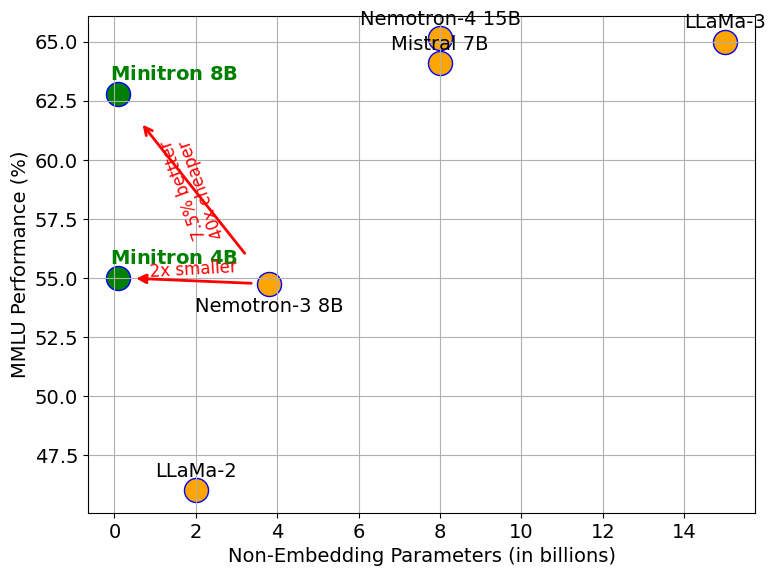

In [152]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import numpy as np
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
# Data from the table with additional non-embedding parameters
models = ['LLaMa-3', 'LLaMa-2', 'Mistral 7B', 'Nemotron-4 15B', 'Nemotron-3 8B', 'Minitron 8B', 'Minitron 4B']
training_tokens = [15, 2, 8, 8, 3.8, 0.094, 0.094, ]  # in trillions
mmlu_performance = [65, 46, 64.07, 65.13, 54.73, 62.78, 55.0,]  # percentages
non_emb_params = [5.9, 6.4, 7, 12.5, 6.4, 6.2, 2.6, ]  # in billions


# training_tokens, non_emb_params = non_emb_params, training_tokens


# Scaling the size for better visualization
size_scale = 300
sizes = [size_scale for _ in training_tokens]

# Colors for the models
colors = plt.cm.get_cmap('viridis', len(mmlu_performance))

# Creating a scatter plot with size of the points based on non-embedding parameters
# fig, ax = plt.subplots(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(8, 6))
plt.grid(True)
for i, (label, xi, yi, size) in enumerate(zip(models, non_emb_params, mmlu_performance, sizes)):
    color = "green" if "Minitron" in label else "orange"
    plt.scatter(xi, yi, s=size, color=color, alpha=1.0, edgecolors="b", linewidth=1, label=label)
    # Annotating with offset to avoid overlapping
    offset = (40, 10) if "Minitron" in label else (0, 10)
    if "Nemotron-3 8B" in label:
        offset = (-0, -20)
    # if Minitron in the name then bold the label
    label = r"$\bf{Minitron\ 8B}$" if "Minitron 8B" in label else label
    label = r"$\bf{Minitron\ 4B}$" if "Minitron 4B" in label else label
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=offset, ha='center', fontsize=14, color='green' if "Minitron" in label else 'k')

if 0:
    # Adding the red arrow between Nemotron-4 15B and Minitron-4 8B
    start_x, start_y = non_emb_params[3], mmlu_performance[3]
    end_x, end_y = non_emb_params[5], mmlu_performance[5]

    # Shortening the arrow by 5% from each side
    arrow_shorten_factor = 0.05
    dx, dy = end_x - start_x, end_y - start_y
    start_x += arrow_shorten_factor * dx
    start_y += arrow_shorten_factor * dy
    end_x -= arrow_shorten_factor * dx
    end_y -= arrow_shorten_factor * dy

    # Calculate the angle of the arrow
    angle = np.arctan2(end_y - start_y, start_x - end_x) * 180 / np.pi + 13

    plt.annotate("", xy=(end_x, end_y), xytext=(start_x, start_y),
                arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='-|>', lw=2))
    # headwidth=20,, headlength=20
    mid_x, mid_y = (start_x + end_x) / 2, (start_y + end_y) / 2
    plt.text(mid_x, mid_y+0.5, "2x smaller", fontsize=12, color='red', rotation=angle, ha='center', va='center', rotation_mode='anchor')



# Adding the red arrow between Nemotron-3 8B and Minitron-4 8B
start_x2, start_y2 = non_emb_params[4], mmlu_performance[4]
end_x2, end_y2 = non_emb_params[5], mmlu_performance[5]

# Shortening the arrow by 5% from each side
arrow_shorten_factor = 0.15
dx2, dy2 = end_x2 - start_x2, end_y2 - start_y2
start_x2 += arrow_shorten_factor * dx2
start_y2 += arrow_shorten_factor * dy2
end_x2 -= arrow_shorten_factor * dx2
end_y2 -= arrow_shorten_factor * dy2

# Calculate the angle of the arrow
angle2 = np.arctan2(end_y2 - start_y2, end_x2 - start_x2) * 180 / np.pi - 5

plt.annotate("", xy=(end_x2, end_y2), xytext=(start_x2, start_y2),
             arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->', linewidth=2))

mid_x2, mid_y2 = (start_x2 + end_x2) / 2, (start_y2 + end_y2) / 2
plt.text(mid_x2+0.2, mid_y2+0., "40x cheaper", fontsize=12, color='red', rotation=angle2, ha='center', va='center', rotation_mode='anchor')

plt.text(mid_x2-0.25, mid_y2+0., "7.5% bettter", fontsize=12, color='red', rotation=angle2, ha='center', va='center', rotation_mode='anchor')


# Adding the red arrow between Nemotron-3 8B and Minitron-4 4B
start_x, start_y = non_emb_params[4], mmlu_performance[4]
end_x, end_y = non_emb_params[6], mmlu_performance[6]

# Shortening the arrow by 5% from each side
arrow_shorten_factor = 0.1
dx, dy = end_x - start_x, end_y - start_y
start_x += arrow_shorten_factor * dx
start_y += arrow_shorten_factor * dy
end_x -= arrow_shorten_factor * dx
end_y -= arrow_shorten_factor * dy

# Calculate the angle of the arrow
angle = np.arctan2(end_y - start_y, start_x - end_x) * 180 / np.pi - 1

plt.annotate("", xy=(end_x, end_y), xytext=(start_x, start_y),
             arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='-|>', lw=2))
# headwidth=20,, headlength=20
mid_x, mid_y = (start_x + end_x) / 2, (start_y + end_y) / 2
plt.text(mid_x, mid_y+0.5, "2x smaller", fontsize=12, color='red', rotation=angle, ha='center', va='center', rotation_mode='anchor')



plt.xlabel('Non-Embedding Parameters (in billions)')
plt.ylabel('MMLU Performance (%)')
plt.gca().invert_xaxis()
plt.xlim(14, 0.5)
plt.ylim(45, 67)

plt.tight_layout()
plt.savefig("minitron.pdf", bbox_inches='tight')

plt.show()


/tmp/ipykernel_2598417/2691706361.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(mmlu_performance))


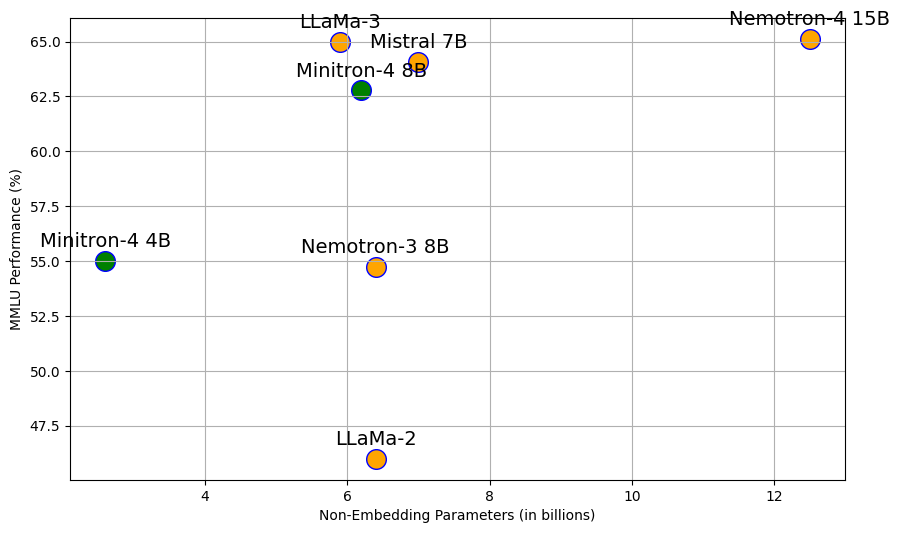

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

# Data from the table with additional non-embedding parameters
models = ['LLaMa-3', 'LLaMa-2', 'Mistral 7B', 'Nemotron-4 15B', 'Nemotron-3 8B', 'Minitron-4 8B', 'Minitron-4 4B']
training_tokens = [15, 2, 8, 8, 3.8, 0.094, 0.094]  # in trillions
mmlu_performance = [65, 46, 64.07, 65.13, 54.73, 62.78, 55.0]  # percentages
non_emb_params = [5.9, 6.4, 7, 12.5, 6.4, 6.2, 2.6]  # in billions

# Scaling the size for better visualization
size_scale = 200
# sizes = [param * size_scale for param in non_emb_params]
# sizes = [training_tokens * size_scale for training_tokens in non_emb_params]
sizes = [size_scale for training_tokens in training_tokens]

colors = plt.cm.get_cmap('viridis', len(mmlu_performance))

# Creating a scatter plot with size of the points based on non-embedding parameters
# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)
for i, (label, xi, yi, size) in enumerate(zip(models, non_emb_params, mmlu_performance, sizes)):
    color = colors(i)
    color = "green" if "Minitron" in label else "orange"
    plt.scatter(xi, yi, s=size, color=color, alpha=1.0, edgecolors="b", linewidth=1, label=label)
    plt.annotate(label, (xi, yi), textcoords="offset points", xytext=(0,10), ha='center', fontsize=14)

plt.xlabel('Non-Embedding Parameters (in billions)')
plt.ylabel('MMLU Performance (%)')
# plt.title('Training Tokens vs MMLU Performance for Various Models')

plt.show()


/tmp/ipykernel_2064482/2953676458.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(data))


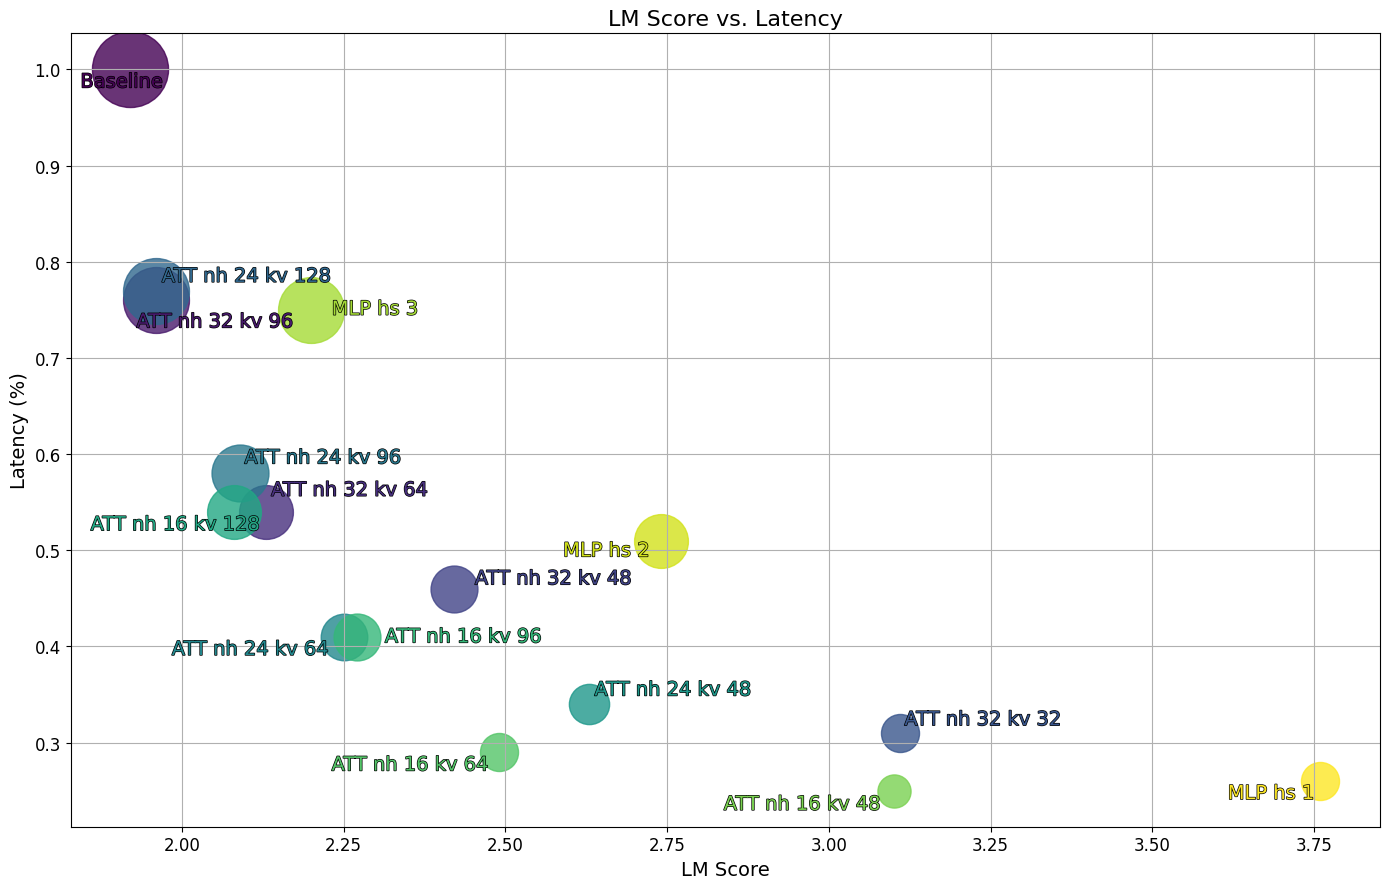

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from adjustText import adjust_text

# Data from the provided table
data = [
    ["Baseline", 1.92, 1.00, 1.00],
    ["ATT nh 32 kv 96", 1.96, .76, .75],
    ["ATT nh 32 kv 64", 2.13, .54, .50],
    ["ATT nh 32 kv 48", 2.42, .46, .38],
    ["ATT nh 32 kv 32", 3.11, .31, .25],
    ["ATT nh 24 kv 128", 1.96, .77, .75],
    ["ATT nh 24 kv 96", 2.09, .58, .56],
    ["ATT nh 24 kv 64", 2.25, .41, .375],
    ["ATT nh 24 kv 48", 2.63, .34, .28],
    ["ATT nh 16 kv 128", 2.08, .54, .50],
    ["ATT nh 16 kv 96", 2.27, .41, .38],
    ["ATT nh 16 kv 64", 2.49, .29, .25],
    ["ATT nh 16 kv 48", 3.10, .25, .19],
    ["MLP hs 3", 2.20, .75, .75],
    ["MLP hs 2", 2.74, .51, .50],
    ["MLP hs 1", 3.76, .26, .25]
]

# Create a balanced colormap
colors = plt.cm.get_cmap('viridis', len(data))

# Extracting data for plotting
x = [row[1] for row in data]
y = [row[2] for row in data]
sizes = [row[3] * 3000 for row in data]  # Scaling the sizes for better visualization
labels = [row[0] for row in data]

# Creating the scatter plot
fig, ax = plt.subplots(figsize=(14, 9))
texts = []
for i, (label, xi, yi, size) in enumerate(zip(labels, x, y, sizes)):
    color = colors(i)
    ax.scatter(xi, yi, s=size, color=color, alpha=0.8)  # Slightly more opaque for better visibility
    texts.append(ax.text(xi, yi, label, ha='center', va='center', color=color, fontsize=14,
                         path_effects=[PathEffects.withStroke(linewidth=1, foreground='black')]))  # Black stroke for contrast

# Use adjustText to optimize label positions
adjust_text(texts, x=x, y=y, ax=ax, expand_points=(1.2, 1.4), force_points=(0.5, 1))

# Setting the font size for axis and labels
ax.set_xlabel('LM Score', fontsize=14)
ax.set_ylabel('Latency (%)', fontsize=14)
ax.set_title('LM Score vs. Latency', fontsize=16)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


/tmp/ipykernel_2084047/4163370135.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(data))
/tmp/ipykernel_2084047/4163370135.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(data))
/tmp/ipykernel_2084047/4163370135.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Paired', len(data))


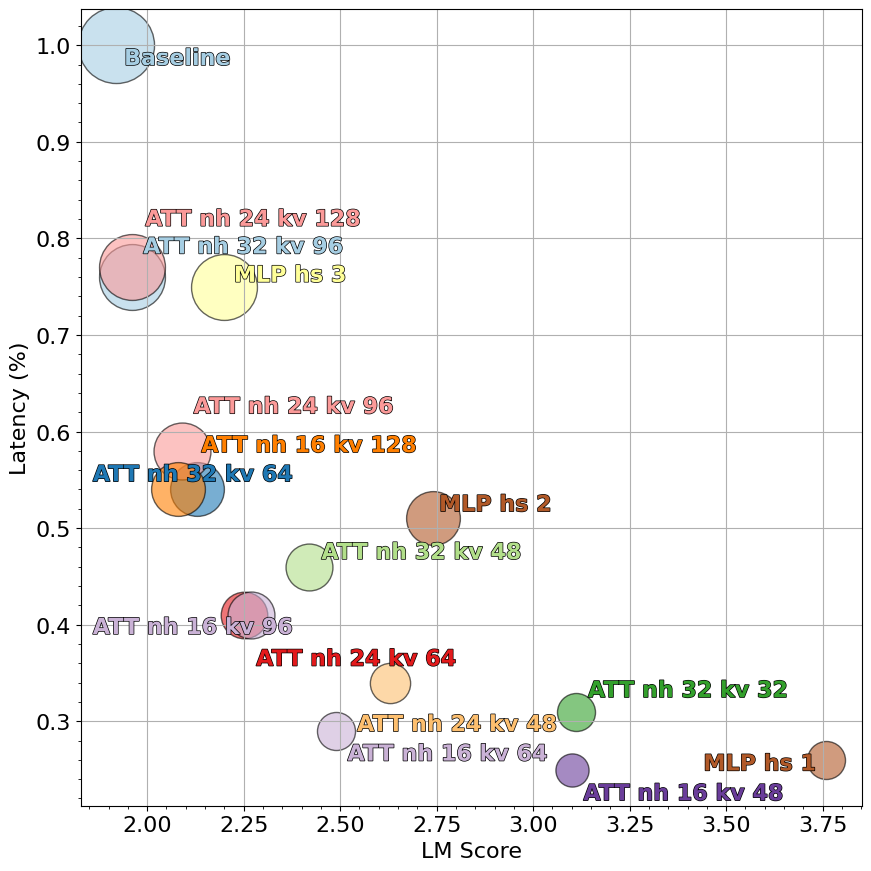

In [41]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from adjustText import adjust_text
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

# Data from the provided table
# name, LM Score, Latency %, params (%)
data = [
    ["Baseline", 1.92, 1.00, 1.00],
    ["ATT nh 32 kv 96", 1.96, .76, .75],
    ["ATT nh 32 kv 64", 2.13, .54, .50],
    ["ATT nh 32 kv 48", 2.42, .46, .38],
    ["ATT nh 32 kv 32", 3.11, .31, .25],
    ["ATT nh 24 kv 128", 1.96, .77, .75],
    ["ATT nh 24 kv 96", 2.09, .58, .56],
    ["ATT nh 24 kv 64", 2.25, .41, .375],
    ["ATT nh 24 kv 48", 2.63, .34, .28],
    ["ATT nh 16 kv 128", 2.08, .54, .50],
    ["ATT nh 16 kv 96", 2.27, .41, .38],
    ["ATT nh 16 kv 64", 2.49, .29, .25],
    ["ATT nh 16 kv 48", 3.10, .25, .19],
    ["MLP hs 3", 2.20, .75, .75],
    ["MLP hs 2", 2.74, .51, .50],
    ["MLP hs 1", 3.76, .26, .25]
]

# Create a colormap
colors = plt.cm.get_cmap('viridis', len(data))
colors = plt.cm.get_cmap('hsv', len(data))
colors = plt.cm.get_cmap('Paired', len(data))

# Extracting data for plotting
x = [row[1] for row in data]
y = [row[2] for row in data]
sizes = [row[3] * 3000 for row in data]  # Scaling the sizes for better visualization
labels = [row[0] for row in data]


# Creating the scatter plot
fig, ax = plt.subplots(figsize=(9, 9))

ax.grid(True)
#enable minor grid lines in the figure
#ax.grid(which='minor', linestyle=':', linewidth='0.15', color='black')
ax.minorticks_on()

texts = []
for i, (label, xi, yi, size) in enumerate(zip(labels, x, y, sizes)):
    color = colors(i)
    ax.scatter(xi, yi, s=size, color=color, alpha=0.6, edgecolors='black', linewidth=1.0)
    texts.append(ax.text(xi, yi, label, ha='center', va='center', color=color, fontsize=16, weight='bold',
                         path_effects=[PathEffects.withStroke(linewidth=1, foreground='black')]))

# Use adjustText to optimize label positions
# adjust_text(texts, x=x, y=y, ax=ax, expand_align=(1.2, 1.4), force_text=(0.5, 1), force_points=(0.5, 1),
#             arrowprops=dict(arrowstyle="->", color='r', lw=0.5))
adjust_text(texts, x=x, y=y, pull_threshold=0.1, only_move = {"text": "y", "static": "xy", "explode": "xy", "pull": "xy"})
# adjust_text(texts, x=x, y=y, expand_points=(1.2, 1.0), force_points=(0.5, 1.0), pull_threshold=0.01)

ax.set_xlabel('LM Score')
ax.set_ylabel('Latency (%)')
# ax.set_title('LM Score vs. Latency')


plt.tight_layout()
plt.savefig("search_space2.pdf", bbox_inches='tight')
plt.show()



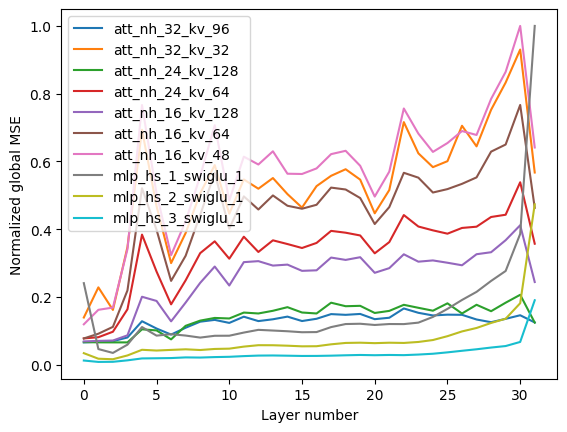

In [4]:
# figure for per layer sensetivity
import pickle
import numpy as np
import matplotlib.pyplot as plt

with open("pretraining_results_dict_gpt8b.p", 'rb') as f:
    results = pickle.load(f)

att_layers = ['mega.att_nh_32_kv_96', 
            #   'mega.att_nh_32_kv_64', 
            #   'mega.att_nh_32_kv_48',
              'mega.att_nh_32_kv_32', 
              'mega.att_nh_24_kv_128', 
            #   'mega.att_nh_24_kv_96', 
              'mega.att_nh_24_kv_64', 
            #   "mega.att_nh_24_kv_48", 
              "mega.att_nh_16_kv_128", 
            #   "mega.att_nh_16_kv_96",
              "mega.att_nh_16_kv_64", 
              "mega.att_nh_16_kv_48", ]
mse_per_op = {}
for layer in att_layers:
    mse_per_op[layer] = []
    for i in range(32):
        d = results[f"language_model.encoder.layers.{i}.self_attention"][layer]
        mse_per_op[layer].append(d["global_mse"])
    mse_per_op[layer] = np.array(mse_per_op[layer])


xs = np.arange(32)
for layer in att_layers:
    plt.plot(xs, mse_per_op[layer] / np.max(mse_per_op["mega.att_nh_16_kv_48"]), label=layer[len("mega."):])
plt.legend(ncols=4, bbox_to_anchor=(1.03, 1.15), prop={'size': 7})
plt.xlabel("Layer number")
plt.ylabel("Normalized global MSE")
plt.grid()

mlp_layers = ['mega.mlp_hs_1_swiglu_1', "mega.mlp_hs_2_swiglu_1", "mega.mlp_hs_3_swiglu_1" ]
for layer in mlp_layers:
    mse_per_op[layer] = []
    for i in range(32):
        d = results[f"language_model.encoder.layers.{i}.mlp"][layer]
        mse_per_op[layer].append(d["global_mse"])
    mse_per_op[layer] = np.array(mse_per_op[layer])
	


for layer in mlp_layers:
    plt.plot(xs, mse_per_op[layer] / np.max(mse_per_op["mega.mlp_hs_1_swiglu_1"]), label=layer[len("mega."):])
plt.legend()
plt.xlabel("Layer number")
plt.ylabel("Normalized global MSE")
plt.grid()



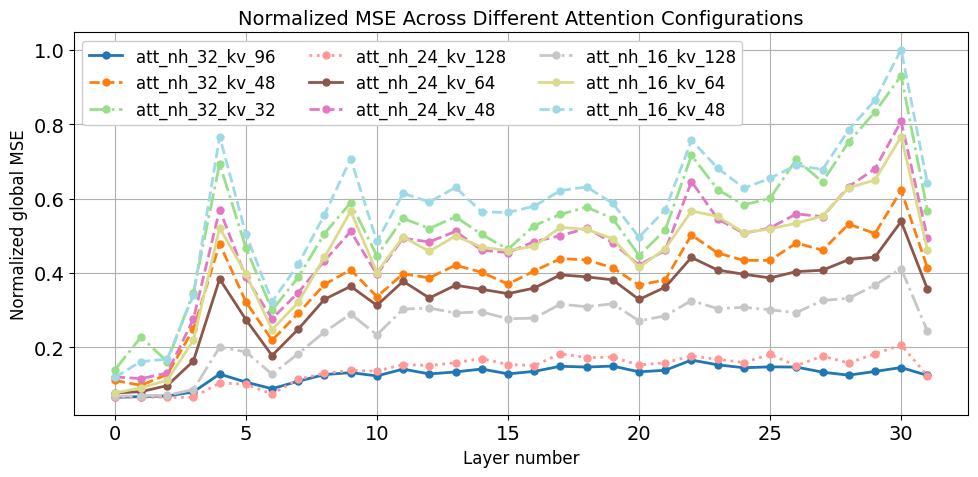

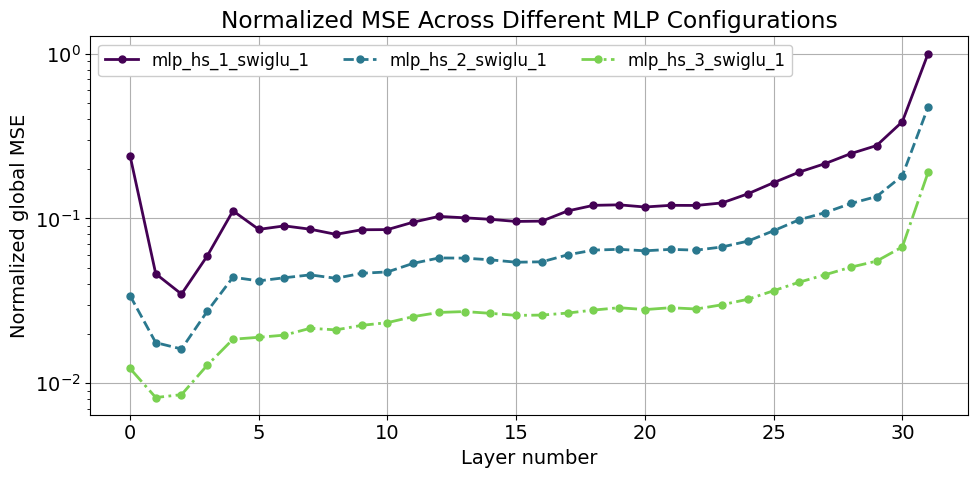

In [30]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams.update({'font.size': 14})

# with open("pretraining_results_dict_gpt8b.p", 'rb') as f:
with open("pretraining_results_dict_gpt8b.p", 'rb') as f:
    results = pickle.load(f)

att_layers = [
    'mega.att_nh_32_kv_96', 
    'mega.att_nh_32_kv_48',
    'mega.att_nh_32_kv_32', 
    'mega.att_nh_24_kv_128', 
    'mega.att_nh_24_kv_64', 
    "mega.att_nh_24_kv_48", 
    'mega.att_nh_16_kv_128', 
    'mega.att_nh_16_kv_64', 
    'mega.att_nh_16_kv_48'
]

mse_per_op = {}
for layer in att_layers:
    mse_per_op[layer] = []
    for i in range(32):
        d = results[f"language_model.encoder.layers.{i}.self_attention"][layer]
        mse_per_op[layer].append(d["global_mse"])
    mse_per_op[layer] = np.array(mse_per_op[layer])

# Normalize the MSEs
normalized_mse_per_op = {k: v / np.max(mse_per_op["mega.att_nh_16_kv_48"]) for k, v in mse_per_op.items()}

xs = np.arange(32)
# colors = plt.cm.viridis(np.linspace(0, 1, len(att_layers)))  # Colormap for the lines
colors = plt.cm.tab20(np.linspace(0, 1, len(att_layers)))  # Colormap for the lines
# colors = plt.cm.Paired(np.linspace(0, 1, len(att_layers)))  # Colormap for the lines
line_styles = ['-', '--', '-.', ':', '-', '--', '-.']*2  # Different line styles

plt.figure(figsize=(10, 5))  # Increase the size of the figure
for layer, color, style in zip(att_layers, colors, line_styles):
    plt.plot(xs, normalized_mse_per_op[layer], label=layer[len("mega."):], linewidth=2, marker='o', markersize=5, color=color, linestyle=style)

plt.legend(loc='upper left', fontsize=12, framealpha=1, ncol=3)  # Set the number of columns in the legend to 3
plt.xlabel("Layer number", fontsize=12)
plt.ylabel("Normalized global MSE", fontsize=12)
plt.title("Normalized MSE Across Different Attention Configurations", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("per_layer_att.pdf", bbox_inches='tight')
plt.show()




# Define the MLP layers to be analyzed
mlp_layers = ['mega.mlp_hs_1_swiglu_1', 'mega.mlp_hs_2_swiglu_1', 'mega.mlp_hs_3_swiglu_1']

# Calculate the MSE for each MLP layer across 32 layers
mse_per_op = {}
for layer in mlp_layers:
    mse_per_op[layer] = []
    for i in range(32):
        d = results[f"language_model.encoder.layers.{i}.mlp"][layer]
        mse_per_op[layer].append(d["global_mse"])
    mse_per_op[layer] = np.array(mse_per_op[layer])

# Normalize the MSEs
normalized_mse_per_op = {k: v / np.max(mse_per_op["mega.mlp_hs_1_swiglu_1"]) for k, v in mse_per_op.items()}

# Create the plot
xs = np.arange(32)
colors = plt.cm.tab20(np.linspace(0, 1, len(mlp_layers)))  # Colormap for the lines
colors = plt.cm.viridis(np.linspace(0, 0.8, len(mlp_layers)))  # Colormap for the lines
line_styles = ['-', '--', '-.']  # Different line styles for each MLP layer

plt.figure(figsize=(10, 5))
for layer, color, style in zip(mlp_layers, colors, line_styles):
    plt.plot(xs, normalized_mse_per_op[layer], label=layer[len("mega."):], linewidth=2, marker='o', markersize=5, color=color, linestyle=style)

plt.gca().set_yscale('log')  # Set the y-axis to a logarithmic scale
plt.legend(loc='upper left', fontsize=12, framealpha=1, ncol=3)
plt.xlabel("Layer number")
plt.ylabel("Normalized global MSE")
plt.title("Normalized MSE Across Different MLP Configurations")
plt.grid(True)
plt.tight_layout()
plt.savefig("per_layer_mlp.pdf", bbox_inches='tight')
plt.show()


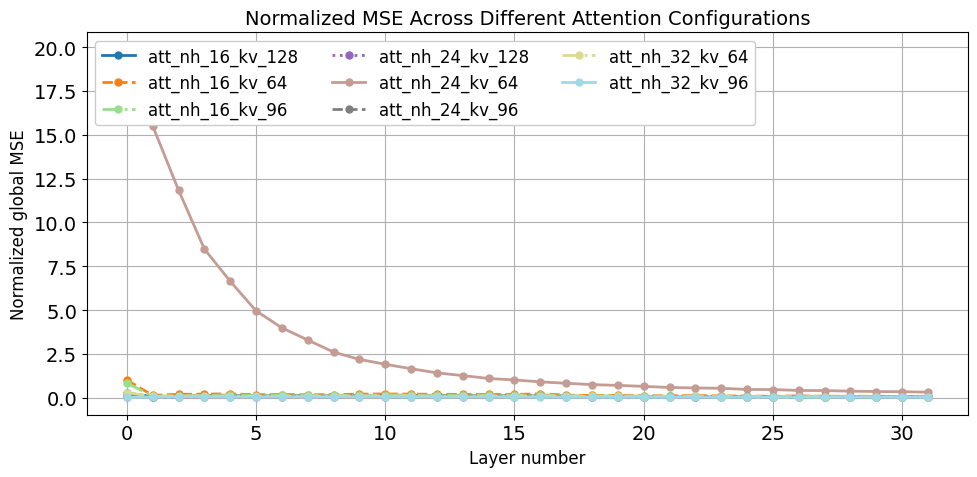

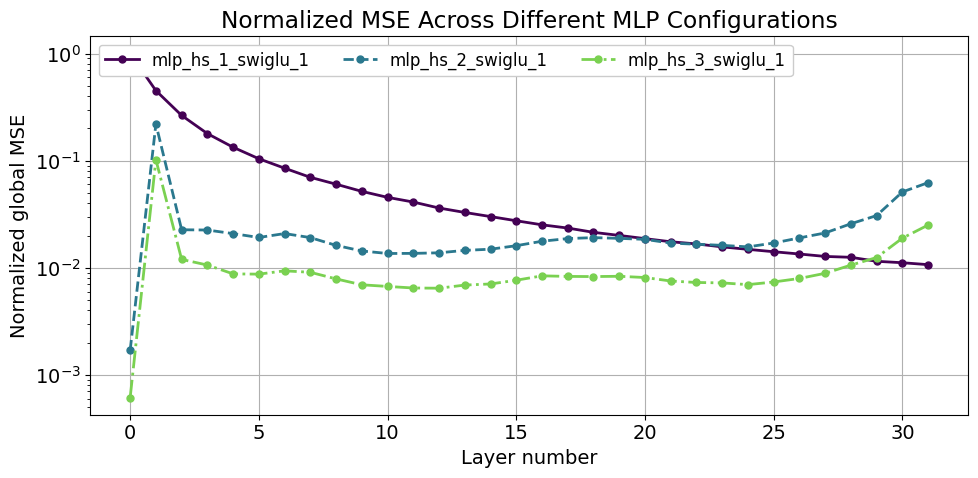

In [34]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams.update({'font.size': 14})

# with open("pretraining_results_dict_gpt8b.p", 'rb') as f:
with open("pretraining_results_dict_llama7b.p", 'rb') as f:
    results = pickle.load(f)

att_layers = [
'mega.att_nh_16_kv_128', 'mega.att_nh_16_kv_64', 'mega.att_nh_16_kv_96', 'mega.att_nh_24_kv_128', 'mega.att_nh_24_kv_64', 'mega.att_nh_24_kv_96', 'mega.att_nh_32_kv_64', 'mega.att_nh_32_kv_96'
]

mse_per_op = {}
for layer in att_layers:
    mse_per_op[layer] = []
    for i in range(32):
        d = results[f"language_model.encoder.layers.{i}.self_attention"][layer]
        mse_per_op[layer].append(d["global_mse"])
    mse_per_op[layer] = np.array(mse_per_op[layer])

# Normalize the MSEs
normalized_mse_per_op = {k: v / np.max(mse_per_op["mega.att_nh_16_kv_64"]) for k, v in mse_per_op.items()}

xs = np.arange(32)
# colors = plt.cm.viridis(np.linspace(0, 1, len(att_layers)))  # Colormap for the lines
colors = plt.cm.tab20(np.linspace(0, 1, len(att_layers)))  # Colormap for the lines
# colors = plt.cm.Paired(np.linspace(0, 1, len(att_layers)))  # Colormap for the lines
line_styles = ['-', '--', '-.', ':', '-', '--', '-.']*2  # Different line styles

plt.figure(figsize=(10, 5))  # Increase the size of the figure
for layer, color, style in zip(att_layers, colors, line_styles):
    plt.plot(xs, normalized_mse_per_op[layer], label=layer[len("mega."):], linewidth=2, marker='o', markersize=5, color=color, linestyle=style)

plt.legend(loc='upper left', fontsize=12, framealpha=1, ncol=3)  # Set the number of columns in the legend to 3
plt.xlabel("Layer number", fontsize=12)
plt.ylabel("Normalized global MSE", fontsize=12)
plt.title("Normalized MSE Across Different Attention Configurations", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("per_layer_att_llama.pdf", bbox_inches='tight')
plt.show()




# Define the MLP layers to be analyzed
mlp_layers = ['mega.mlp_hs_1_swiglu_1', 'mega.mlp_hs_2_swiglu_1', 'mega.mlp_hs_3_swiglu_1']

# Calculate the MSE for each MLP layer across 32 layers
mse_per_op = {}
for layer in mlp_layers:
    mse_per_op[layer] = []
    for i in range(32):
        d = results[f"language_model.encoder.layers.{i}.mlp"][layer]
        mse_per_op[layer].append(d["global_mse"])
    mse_per_op[layer] = np.array(mse_per_op[layer])

# Normalize the MSEs
normalized_mse_per_op = {k: v / np.max(mse_per_op["mega.mlp_hs_1_swiglu_1"]) for k, v in mse_per_op.items()}

# Create the plot
xs = np.arange(32)
colors = plt.cm.tab20(np.linspace(0, 1, len(mlp_layers)))  # Colormap for the lines
colors = plt.cm.viridis(np.linspace(0, 0.8, len(mlp_layers)))  # Colormap for the lines
line_styles = ['-', '--', '-.']  # Different line styles for each MLP layer

plt.figure(figsize=(10, 5))
for layer, color, style in zip(mlp_layers, colors, line_styles):
    plt.plot(xs, normalized_mse_per_op[layer], label=layer[len("mega."):], linewidth=2, marker='o', markersize=5, color=color, linestyle=style)

plt.gca().set_yscale('log')  # Set the y-axis to a logarithmic scale
plt.legend(loc='upper left', fontsize=12, framealpha=1, ncol=3)
plt.xlabel("Layer number")
plt.ylabel("Normalized global MSE")
plt.title("Normalized MSE Across Different MLP Configurations")
plt.grid(True)
plt.tight_layout()
plt.savefig("per_layer_mlp_llama.pdf", bbox_inches='tight')
plt.show()


/tmp/ipykernel_2064482/1616413888.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('tab20b')
/tmp/ipykernel_2064482/1616413888.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('tab20c')
/tmp/ipykernel_2064482/1616413888.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('autumn')


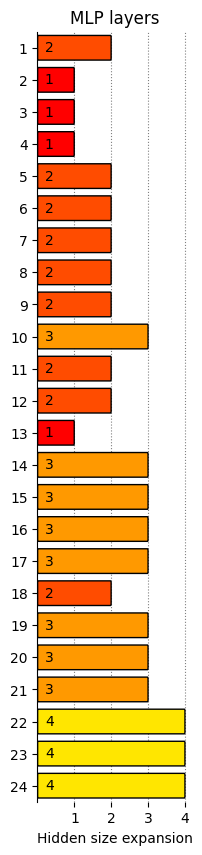

In [3]:

architecture = [1, 2, 3, 4]*8

# %50%
architecture = [2, 1, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3, 3, 3, 3,2 ,3 ,3 ,3 ,4,4,4]
# %80%
# architecture = [3, 4, 4, 4, 4, 3 ,4 , 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4]


#attention
# %50%
# architecture = [2, 2, 1, 2, 2, 1, 1, 3, 1, 2 , 3, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 3, 1]
# %80%
# architecture = [2, 2, 1, 3, 2, 2, 4, 3, 2,3, 4, 2, 4, 4, 3, 4, 3, 4, 4, 4, 2, 3, 3, 3]


MLP = True

plt.close('all')
teacher_idx = []
i = 0
figure = plt.gcf() # get current figure
figure.set_size_inches(2, 10)

color = 'tab:blue'

cmap = matplotlib.cm.get_cmap('tab20b')
if MLP:
    
    cmap = matplotlib.cm.get_cmap('tab20c')
    cmap = matplotlib.cm.get_cmap('autumn')
else:
    cmap = matplotlib.cm.get_cmap('summer')
    
align = 'center'

if MLP:
    color_multiplier = 6
else:
    color_multiplier = 6

colors = []
for point in architecture:
    if point<2:
        colors.append(cmap(0.0*color_multiplier))
    elif point<3:
        colors.append(cmap(0.05*color_multiplier))
    elif point<4:
        colors.append(cmap(0.1*color_multiplier))
    else:
        colors.append(cmap(0.15*color_multiplier))

# plt.ylim(top=4.4)
center_graph=False
if center_graph:
    left = (4 - np.array(architecture)) / 2
else:
    left=0
    

plt.barh(np.arange(len(architecture))+1, architecture, color=colors, edgecolor="black", joinstyle="round", align=align, left=left, )

plt.xticks([1, 2, 3, 4])
labels = ["4", "3", "2", "1", "1", "2", "3", "4"]
if center_graph:
    if not MLP:
        labels = ["16", "12", "8", "4", "4", "8", "12", "16"]
        
    plt.xticks([0.0, 0.5, 1, 1.5,  2.5, 3, 3.5, 4], labels=labels)
    
# plt.xticklabels(labels)

if not MLP:
    plt.ylabel("Layer")


plt.gca().xaxis.grid(color='gray', linestyle=':')
plt.gca().set_axisbelow(True)
plt.ylim(0.5, len(architecture)+0.5)
plt.gca().invert_yaxis()
plt.yticks(np.arange(1, len(architecture)+1, 1.0))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
if 1:
    from matplotlib.patches import FancyBboxPatch
    new_patches = []
    for patch in reversed(plt.gca().patches):
        bb = patch.get_bbox()
        color=patch.get_facecolor()
        p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                            abs(bb.width), abs(bb.height),
                            boxstyle="round,pad=-0.0040,rounding_size=0.015",
                            fc=color, edgecolor="black",
                            mutation_aspect=4
                            )
        patch.remove()
        new_patches.append(p_bbox)

    for patch in new_patches:
        plt.gca().add_patch(patch)
        
# texts = [f"{a*25:d}" for a in architecture]
texts = [a for a in architecture]
if not MLP:
    texts = [a*4 for a in architecture] 
for bar, text in zip(plt.gca().patches, texts[::-1]):
    location = -0.1+2.0-0.075*(int(text)>10) if center_graph else 0.2
    plt.gca().text(location, bar.get_y()+bar.get_height()/2, text, color = 'black', ha = 'left', va = 'center') 
    
    
if MLP:
    plt.title("MLP layers")
    plt.xlabel("Hidden size expansion")
else:
    plt.title("Attention layers")
    plt.xlabel("#heads")
    
plt.savefig("architecture.pdf", bbox_inches='tight')
